# Assignment #4: Linear Models and Decision Trees
## Foundations of Machine Learning
## Do Q1 and one other question.
### Advice: Reuse your code and code from lectures, package routine tasks into functions, make plans about how you'll carry out the analysis before jumping into writing code, and work as efficiently as possible

assignment4/assignment4.ipynb**Q1.** This question is a case study for linear models and decision trees. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv 
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Let's focus on linear models. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the test set? Make a second model where, for the categorical variables, make a model comprised of one-hot encoded regressors/features alone, and regress price on those variables; what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using, along with the categorical variables. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 3?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.
  7. Now, let's use a regression tree. Construct an appropriate matrix of regressors/features, and fit a tree to the data. Vary the maximum depth of the decision tree using the `max_depth` option (i.e. `tree.DecisionTreeRegressor(max_depth=D)`), and compute the $R^2$ and `RMSE` on the test set of a variety of depths. What depth tree gives the best results?
  8. For your best tree, determine the predicted values for the test data, and plot them against the true values. Do the predicted values and true values line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero?
  12. Which model --- linear model or classification and regression tree --- has better performance on the test set?

In [1]:
#1 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('cars_hw.csv') 
# Import data into environment
df.head()
gdf = df.copy()



In [2]:
#make box plot for numerical data 

<Axes: >

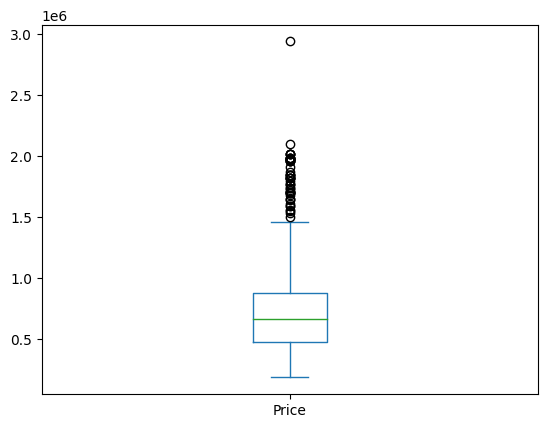

In [3]:
df['Price'].plot.box() #outliers above 1.5 which is 1,500,000 

In [4]:
gdf = df.loc[df['Price']<1500000,:] #remove outliers

2022


/tmp/ipykernel_111390/4178651234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf['age'] = max(df['Make_Year'])-df['Make_Year']
/tmp/ipykernel_111390/4178651234.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf['age'] = gdf['age'].astype(int)


<Axes: >

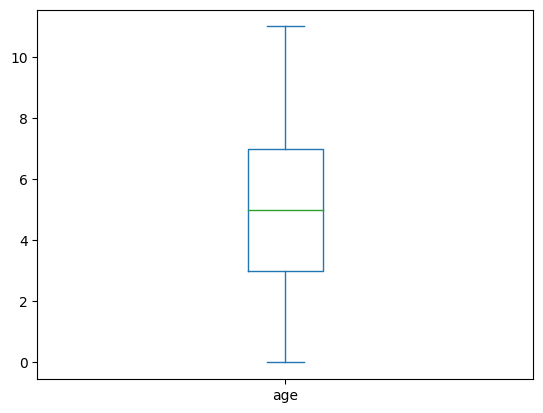

In [5]:
gdf['age'] = max(df['Make_Year'])-df['Make_Year']
print(max(df['Make_Year'])) #max age is 2022
gdf['age'] = gdf['age'].astype(int)
gdf['age'].plot.box() #no outliers

<Axes: >

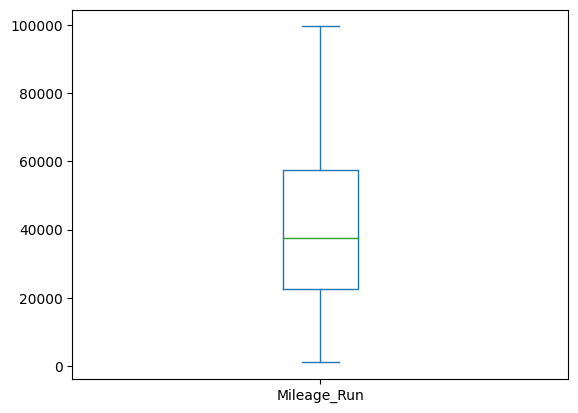

In [6]:
df['Mileage_Run'].plot.box() #no outliers


In [7]:
#changing values into integers
gdf['No_of_Owners'] = gdf['No_of_Owners'].replace('1st',1)
gdf['No_of_Owners'] = gdf['No_of_Owners'].replace('2nd',2)
gdf['No_of_Owners'] = gdf['No_of_Owners'].replace('3rd',3)
gdf['No_of_Owners'] = gdf['No_of_Owners'].astype(int)
print(gdf['No_of_Owners'].value_counts()) #make sure all is changed

1    764
2    154
3      4
Name: No_of_Owners, dtype: int64


/tmp/ipykernel_111390/1164212232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf['No_of_Owners'] = gdf['No_of_Owners'].replace('1st',1)
/tmp/ipykernel_111390/1164212232.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf['No_of_Owners'] = gdf['No_of_Owners'].replace('2nd',2)
/tmp/ipykernel_111390/1164212232.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [8]:
print(df['Make'].value_counts(),'\n') #checking values of make

Hyundai          305
Maruti Suzuki    293
Honda             73
Renault           68
Ford              52
Toyota            50
MG Motors         35
Volkswagen        29
Tata              23
Mahindra          18
Kia                8
Chevrolet          6
Skoda              5
Nissan             4
Jeep               4
Datsun             3
Name: Make, dtype: int64 



<Axes: xlabel='Mileage_Run', ylabel='Price'>

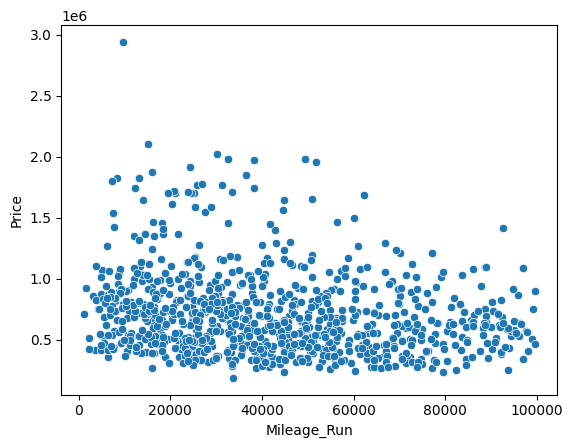

In [9]:
sns.scatterplot(data=df,y='Price',x='Mileage_Run')

<Axes: ylabel='Density'>

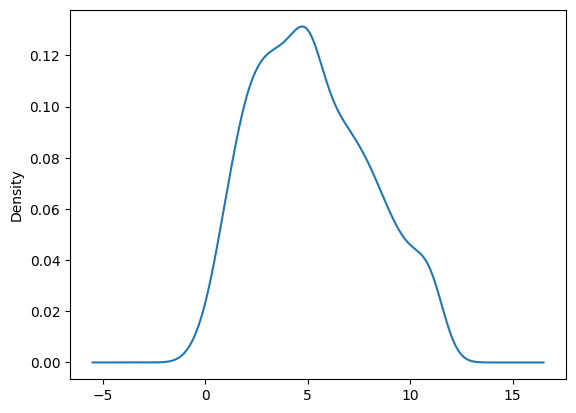

In [10]:
gdf['age'].plot.density() #no long tails so no need of arc sin or log transformation

<Axes: ylabel='Density'>

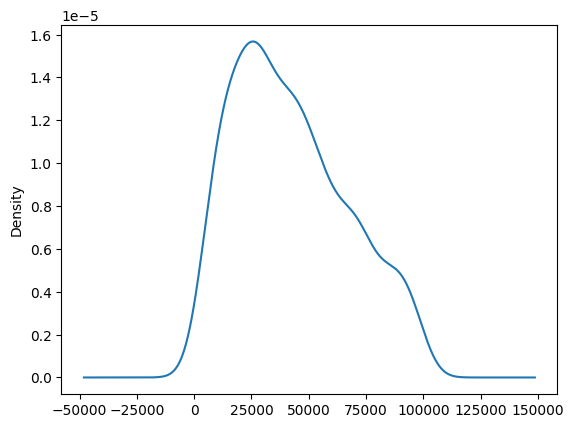

In [11]:
gdf['Mileage_Run'].plot.density() #no long tails so no need of arc sin or log transformation

count    9.220000e+02
mean     6.768807e+05
std      2.563079e+05
min      1.880000e+05
25%      4.642500e+05
50%      6.470000e+05
75%      8.367500e+05
max      1.465000e+06
Name: Price, dtype: float64
               Price                                                     \
               count          mean            std        min        25%   
Make                                                                      
Chevrolet        6.0  4.535000e+05  246606.366503   267000.0   288500.0   
Datsun           3.0  2.896667e+05   10503.967504   279000.0   284500.0   
Ford            52.0  7.211731e+05  140927.699605   290000.0   635000.0   
Honda           72.0  7.887222e+05  253474.460320   316000.0   580750.0   
Hyundai        304.0  6.884375e+05  273012.825123   248000.0   484750.0   
Jeep             1.0  1.290000e+06            NaN  1290000.0  1290000.0   
Kia              1.0  1.369000e+06            NaN  1369000.0  1369000.0   
Mahindra        18.0  1.100167e+06  175549.305

<Axes: ylabel='Density'>

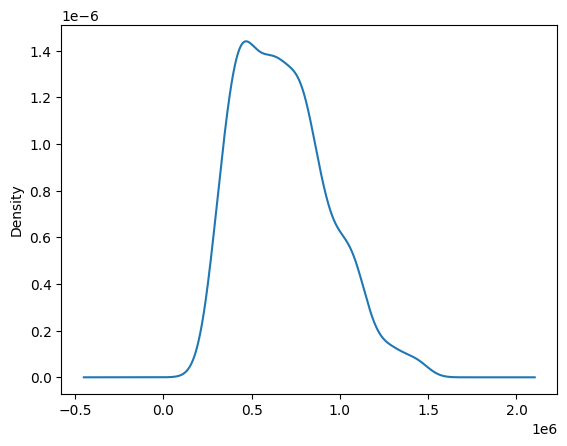

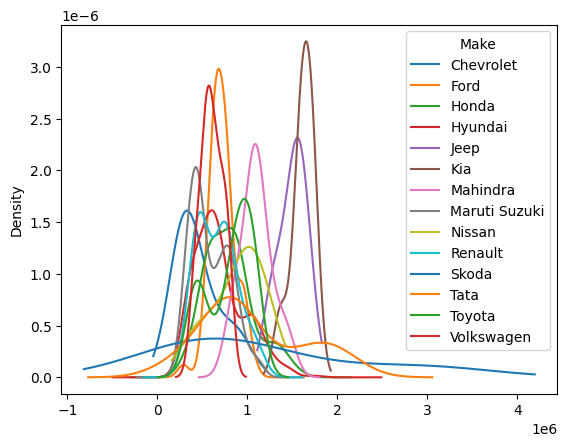

In [12]:
#2 
print(gdf['Price'].describe()) #describe price
gdf['Price'].plot.density() #plot for density
print(gdf.loc[:,['Make','Price']].groupby('Make').describe())
groupPlot = df.pivot(columns='Make', values='Price')
#did not included Datsun as values made it harder to read the rest of the graph for the other cars makes
groupPlot[['Chevrolet','Ford','Honda','Hyundai','Jeep','Kia','Mahindra','Maruti Suzuki','Nissan','Renault','Skoda','Tata','Toyota','Volkswagen']].plot.density()

In [13]:
#datsun has one model really cheap, did not include
#the most expensive car brand is Kia, as it averages the highest prices (highest density value as the largest price (value further on the x axis))
#the prices average is 676,880.7 which is clearly very high and not accurate making me think that the price is not in dollars or that a deciaml place was dropped or put in the wrong position
#even if the number does not accuratly the true number value, it can still give us an idea how values relates still 


0.012725096853528739 is the R^2 value
253937.88146837242 is the RMSE value


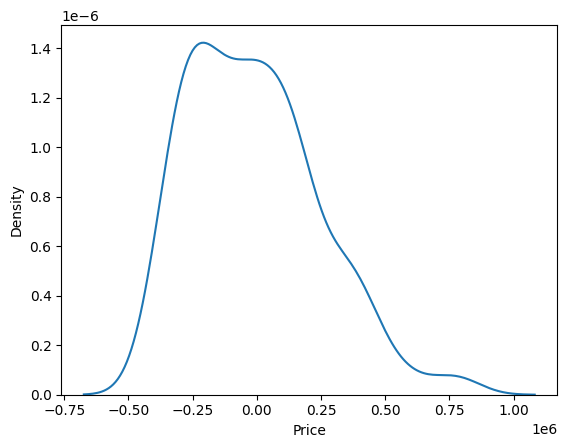

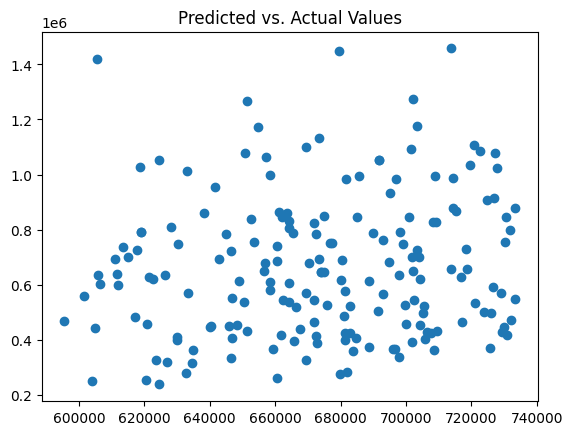

In [16]:
#3
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 

y = gdf['Price'] # Create target variable vector
X = gdf.loc[:,['Mileage_Run']] # Create feature matrix

## Test-train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

reg = LinearRegression().fit(X_train, y_train) # Fit the linear model
y_pred = reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

(reg.intercept_) # Intercept value
(reg.coef_) # Regression coefficients
print(reg.score(X_test, y_test),"is the R^2 value") # R squared measure 
print(rmse, "is the RMSE value")

residuals_lm = y_test - y_pred

## Residual plot:
sns.kdeplot(residuals_lm)
plt.show()

## True versus predicted plot:
plt.scatter(x=y_pred,y=y_test)
plt.title('Predicted vs. Actual Values')
plt.show()

In [17]:
#4 
y = gdf['Price']
gdf['mileage_run_sq'] = gdf['Mileage_Run']**2
gdf['age_sq'] = gdf['age']**2
gdf['No_of_Owners_sq'] = gdf['No_of_Owners']**2

from sklearn.linear_model import LinearRegression # Import linear regression model
from sklearn.metrics import mean_squared_error 

vars = ['Mileage_Run','mileage_run_sq','age','age_sq','No_of_Owners','No_of_Owners_sq'] # This is a list of variables to use

Xv = gdf.loc[:,vars] # Construct data matrix
print(Xv.head()) # Peek at data

X_train, X_test, y_train, y_test = train_test_split(Xv, y, test_size=0.2, random_state=50)

reg = LinearRegression().fit(X_train, y_train) # Fit the linear model
y_pred = reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

(reg.intercept_) # Intercept value
(reg.coef_) # Regression coefficients
print(reg.score(X_test, y_test),"is the R^2 value for price regressed on numeric values") # R squared measure 
print(rmse, "is the RMSE value for price regressed on numeric values")

#high RMSE value means not accurate model, low R^2 means that the model is not good at predicting the value, 


   Mileage_Run  mileage_run_sq  age  age_sq  No_of_Owners  No_of_Owners_sq
0        44611      1990141321    5      25             1                1
1        20305       412293025    6      36             1                1
2        29540       872611600    3       9             2                4
3        35680      1273062400    5      25             1                1
4        25126       631315876    5      25             1                1
0.2991914327621934 is the R^2 value for price regressed on numeric values
213947.9574367675 is the RMSE value for price regressed on numeric values


/tmp/ipykernel_111390/134627053.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf['mileage_run_sq'] = gdf['Mileage_Run']**2
/tmp/ipykernel_111390/134627053.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf['age_sq'] = gdf['age']**2
/tmp/ipykernel_111390/134627053.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [18]:
catDF = gdf[["Make", "Color", "Body_Type", "No_of_Owners", "Fuel_Type", "Transmission", "Transmission_Type"]]

# Apply one-hot encoding to all categorical columns in catDF
ddf = pd.get_dummies(catDF, dtype='int')
ddf.head()

#do i need the one_hot_encoder = LabelBinarizer() 

y = gdf['Price']

X_train, X_test, y_train, y_test = train_test_split(ddf, y, test_size=0.2, random_state=50)

reg = LinearRegression().fit(X_train, y_train) # Fit the linear model
y_pred = reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

(reg.intercept_) # Intercept value
(reg.coef_) # Regression coefficients
print(reg.score(X_test, y_test),"is the R^2 value for price regressed on categorical values") # R squared measure 
print(rmse, "is the RMSE value for price regressed on categorical values")

0.5679263808433535 is the R^2 value for price regressed on categorical values
167991.5041980526 is the RMSE value for price regressed on categorical values


In [19]:
#better with the categorical and numeric values as highest R^2 value and lowest RMSE value, meaning that it has the best model predictor

In [66]:
#joint
jointDF = pd.concat([ddf, X], axis=1)
jointDF.head()

y = gdf['Price']

X_train, X_test, y_train, y_test = train_test_split(jointDF, y, test_size=0.2, random_state=50)

reg = LinearRegression().fit(X_train, y_train) # Fit the linear model
y_pred = reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

(reg.intercept_) # Intercept value
(reg.coef_) # Regression coefficients
print(reg.score(X_test, y_test),"is the R^2 value for price regressed on categorical and numeric values") # R squared measure 
print(rmse, "is the RMSE value for price regressed on categorical and numeric values")

0.621994308042976 is the R^2 value for price regressed on categorical and numeric values
157129.4582559431 is the RMSE value for price regressed on categorical and numeric values


In [65]:
#the joint model preforms the best as it has the highest R^2 value (greater than a .158 difference from categorical due) and RMSE is also smallest value (it is aprox. 35,000 less than the lowest RMSE value from the catgegorical regression)

In [37]:
#5 
#below joint DF

In [62]:
y = gdf['Price']
X = jointDF


## Test-train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)


In [63]:
# Linear Model sample code:
from sklearn.linear_model import LinearRegression # Import linear regression model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Expand features
expander = PolynomialFeatures(degree=1,include_bias=False) # Create the expander
#
Z_train = expander.fit_transform(X_train) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_train_lm = pd.DataFrame(data=Z_train, columns = names) # Create a new, expanded dataframe
#
Z_test = expander.fit_transform(X_test) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_test_lm = pd.DataFrame(data=Z_test, columns = names) # Create a new, expanded dataframe

# Fit the model and get the R2 measure:
reg = LinearRegression().fit(X_train_lm, y_train) # Fit the linear model
# Predicted values:
y_hat_lm = reg.predict(X_test_lm)

## Metrics:
rmse = np.sqrt(mean_squared_error(y_test, y_hat_lm))
r_squared = r2_score(y_test, y_hat_lm)

print(r_squared, "this is the R^2 value for degree of 1")
print(rmse, "this is the RMSE value for degree of 1")

0.6194809929377051 this is the R^2 value for degree of 1
157650.96042561327 this is the RMSE value for degree of 1


In [41]:

# Expand features
expander = PolynomialFeatures(degree=2,include_bias=False) # Create the expander
#
Z_train = expander.fit_transform(X_train) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_train_lm = pd.DataFrame(data=Z_train, columns = names) # Create a new, expanded dataframe
#
Z_test = expander.fit_transform(X_test) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_test_lm = pd.DataFrame(data=Z_test, columns = names) # Create a new, expanded dataframe

# Fit the model and get the R2 measure:
reg = LinearRegression().fit(X_train_lm, y_train) # Fit the linear model
# Predicted values:
y_hat_lm = reg.predict(X_test_lm)

## Metrics:
rmse = np.sqrt(mean_squared_error(y_test, y_hat_lm))
r_squared = r2_score(y_test, y_hat_lm)

print(r_squared, "this is the R^2 value for degree of 2")
print(rmse, "this is the RMSE value for degree of 2")

0.23454376448637904 this is the R^2 value for degree of 2
223598.36628368223 this is the RMSE value for degree of 2


In [43]:

# Expand features
expander = PolynomialFeatures(degree=3,include_bias=False) # Create the expander
#
Z_train = expander.fit_transform(X_train) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_train_lm = pd.DataFrame(data=Z_train, columns = names) # Create a new, expanded dataframe
#
Z_test = expander.fit_transform(X_test) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_test_lm = pd.DataFrame(data=Z_test, columns = names) # Create a new, expanded dataframe

# Fit the model and get the R2 measure:
reg = LinearRegression().fit(X_train_lm, y_train) # Fit the linear model
# Predicted values:
y_hat_lm = reg.predict(X_test_lm)

## Metrics:
rmse = np.sqrt(mean_squared_error(y_test, y_hat_lm))
r_squared = r2_score(y_test, y_hat_lm)

print(r_squared, "this is the R^2 value for degree of 3")
print(rmse, "this is the RMSE value for degree of 3")

-6.808377441669633 this is the R^2 value for degree of 3
714149.0166143922 this is the RMSE value for degree of 3


In [25]:
#the R^2 value gets negative at degree of 3 for the joint DF
#the RMSE gets bigger as the degrees increase and the R^2 gets smaller for joint DF

In [26]:
#doing it with the categorical variables

In [44]:
y = gdf['Price']
X = ddf


## Test-train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)


In [45]:
# Expand features
expander = PolynomialFeatures(degree=1,include_bias=False) # Create the expander
#
Z_train = expander.fit_transform(X_train) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_train_lm = pd.DataFrame(data=Z_train, columns = names) # Create a new, expanded dataframe
#
Z_test = expander.fit_transform(X_test) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_test_lm = pd.DataFrame(data=Z_test, columns = names) # Create a new, expanded dataframe

# Fit the model and get the R2 measure:
reg = LinearRegression().fit(X_train_lm, y_train) # Fit the linear model

# Predicted values:
y_hat_lm = reg.predict(X_test_lm)

## Metrics:
rmse = np.sqrt(mean_squared_error(y_test, y_hat_lm))
r_squared = r2_score(y_test, y_hat_lm)

print(r_squared, "this is the R^2 value for degree of 1 for categorical data")
print(rmse, "this is the RMSE value for degree of 1 for categorical data")

0.5679263808433535 this is the R^2 value for degree of 1 for categorical data
167991.5041980526 this is the RMSE value for degree of 1 for categorical data


In [46]:
# Expand features
expander = PolynomialFeatures(degree=2,include_bias=False) # Create the expander
#
Z_train = expander.fit_transform(X_train) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_train_lm = pd.DataFrame(data=Z_train, columns = names) # Create a new, expanded dataframe
#
Z_test = expander.fit_transform(X_test) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_test_lm = pd.DataFrame(data=Z_test, columns = names) # Create a new, expanded dataframe

# Fit the model and get the R2 measure:
reg = LinearRegression().fit(X_train_lm, y_train) # Fit the linear model

# Predicted values:
y_hat_lm = reg.predict(X_test_lm)

## Metrics:
rmse = np.sqrt(mean_squared_error(y_test, y_hat_lm))
r_squared = r2_score(y_test, y_hat_lm)

print(r_squared, "this is the R^2 value for degree of 2 for categorical data")
print(rmse, "this is the RMSE value for degree of 2 for categorical data")

-1.0200692959652707e+24 this is the R^2 value for degree of 2 for categorical data
2.5812096567600618e+17 this is the RMSE value for degree of 2 for categorical data


In [30]:
#the r^2 value turns negative a 2 degrees for the categorical data

In [31]:
#do it with numeric data

In [47]:
y = gdf['Price']
X = Xv


## Test-train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)


In [48]:
# Expand features
expander = PolynomialFeatures(degree=1,include_bias=False) # Create the expander
#
Z_train = expander.fit_transform(X_train) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_train_lm = pd.DataFrame(data=Z_train, columns = names) # Create a new, expanded dataframe
#
Z_test = expander.fit_transform(X_test) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_test_lm = pd.DataFrame(data=Z_test, columns = names) # Create a new, expanded dataframe

# Fit the model and get the R2 measure:
reg = LinearRegression().fit(X_train_lm, y_train) # Fit the linear model

# Predicted values:
y_hat_lm = reg.predict(X_test_lm)

## Metrics:
rmse = np.sqrt(mean_squared_error(y_test, y_hat_lm))
r_squared = r2_score(y_test, y_hat_lm)

print(r_squared, "this is the R^2 value for degree of 1 for numeric data")
print(rmse, "this is the RMSE value for degree of 1 for numeric data")

0.2991914327621934 this is the R^2 value for degree of 1 for numeric data
213947.9574367675 this is the RMSE value for degree of 1 for numeric data


In [50]:
# Expand features
expander = PolynomialFeatures(degree=2,include_bias=False) # Create the expander
#
Z_train = expander.fit_transform(X_train) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_train_lm = pd.DataFrame(data=Z_train, columns = names) # Create a new, expanded dataframe
#
Z_test = expander.fit_transform(X_test) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_test_lm = pd.DataFrame(data=Z_test, columns = names) # Create a new, expanded dataframe

# Fit the model and get the R2 measure:
reg = LinearRegression().fit(X_train_lm, y_train) # Fit the linear model

# Predicted values:
y_hat_lm = reg.predict(X_test_lm)

## Metrics:
rmse = np.sqrt(mean_squared_error(y_test, y_hat_lm))
r_squared = r2_score(y_test, y_hat_lm)

print(r_squared, "this is the R^2 value for degree of 2 for numeric data")
print(rmse, "this is the RMSE value for degree of 2 for numeric data")

0.28660714167518375 this is the R^2 value for degree of 1 for numeric data
215860.32277912722 this is the RMSE value for degree of 1 for numeric data


In [51]:
# Expand features
expander = PolynomialFeatures(degree=3,include_bias=False) # Create the expander
#
Z_train = expander.fit_transform(X_train) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_train_lm = pd.DataFrame(data=Z_train, columns = names) # Create a new, expanded dataframe
#
Z_test = expander.fit_transform(X_test) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_test_lm = pd.DataFrame(data=Z_test, columns = names) # Create a new, expanded dataframe

# Fit the model and get the R2 measure:
reg = LinearRegression().fit(X_train_lm, y_train) # Fit the linear model

# Predicted values:
y_hat_lm = reg.predict(X_test_lm)

rmse = np.sqrt(mean_squared_error(y_test, y_hat_lm))
r_squared = r2_score(y_test, y_hat_lm)

print(r_squared, "this is the R^2 value for degree of 3 for numeric data")
print(rmse, "this is the RMSE value for degree of 3 for numeric data")

0.2102983043066482 this is the R^2 value for degree of 1 for numeric data
227111.94609791657 this is the RMSE value for degree of 1 for numeric data


In [60]:
# Expand features
expander = PolynomialFeatures(degree=15,include_bias=False) # Create the expander
#
Z_train = expander.fit_transform(X_train) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_train_lm = pd.DataFrame(data=Z_train, columns = names) # Create a new, expanded dataframe
#
Z_test = expander.fit_transform(X_test) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_test_lm = pd.DataFrame(data=Z_test, columns = names) # Create a new, expanded dataframe

# Fit the model and get the R2 measure:
reg = LinearRegression().fit(X_train_lm, y_train) # Fit the linear model

# Predicted values:
y_hat_lm = reg.predict(X_test_lm)

rmse = np.sqrt(mean_squared_error(y_test, y_hat_lm))
r_squared = r2_score(y_test, y_hat_lm)

print(r_squared, "this is the R^2 value for degree of 15 for numeric data")
print(rmse, "this is the RMSE value for degree of 15 for numeric data")

0.028554066722987992 this is the R^2 value for degree of 15 for numeric data
251893.96392274674 this is the RMSE value for degree of 15 for numeric data


In [61]:
# Expand features
expander = PolynomialFeatures(degree=16,include_bias=False) # Create the expander
#
Z_train = expander.fit_transform(X_train) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_train_lm = pd.DataFrame(data=Z_train, columns = names) # Create a new, expanded dataframe
#
Z_test = expander.fit_transform(X_test) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_test_lm = pd.DataFrame(data=Z_test, columns = names) # Create a new, expanded dataframe

# Fit the model and get the R2 measure:
reg = LinearRegression().fit(X_train_lm, y_train) # Fit the linear model

# Predicted values:
y_hat_lm = reg.predict(X_test_lm)

## Metrics:
rmse = np.sqrt(mean_squared_error(y_test, y_hat_lm))
r_squared = r2_score(y_test, y_hat_lm)

print(r_squared, "this is the R^2 value for degree of 16 for numeric data")
print(rmse, "this is the RMSE value for degree of 16 for numeric data")

-0.002904812715997407 this is the R^2 value for degree of 16 for numeric data
255940.07987547005 this is the RMSE value for degree of 16 for numeric data


In [39]:
#the r^2 value turns negative at 16th degree 

In [40]:
#the joint for degree 1 has a highest R^2 value in 5
#the highest R^2 value is from question 4 with the joint model

In [67]:
#6
#the best model

In [68]:
#joint
jointDF = pd.concat([ddf, X], axis=1)
jointDF.head()

y = gdf['Price']

X_train, X_test, y_train, y_test = train_test_split(jointDF, y, test_size=0.2, random_state=50)

reg = LinearRegression().fit(X_train, y_train) # Fit the linear model
y_pred = reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

(reg.intercept_) # Intercept value
(reg.coef_) # Regression coefficients
print(reg.score(X_test, y_test),"is the R^2 value for price regressed on categorical and numeric values") # R squared measure 
print(rmse, "is the RMSE value for price regressed on categorical and numeric values")

0.621994308042976 is the R^2 value for price regressed on categorical and numeric values
157129.4582559431 is the RMSE value for price regressed on categorical and numeric values


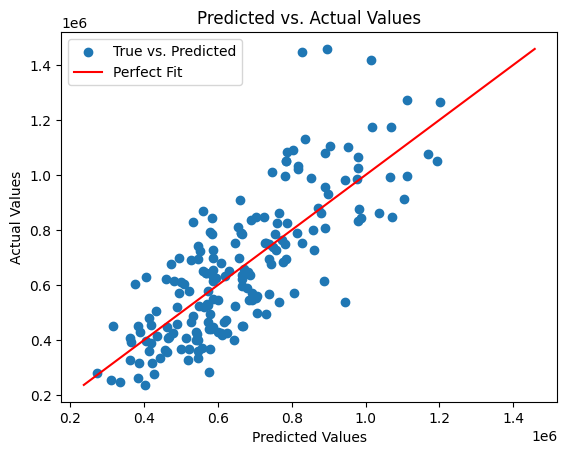

In [69]:
plt.scatter(x=y_pred, y=y_test, label='True vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='red', label='Perfect Fit')

plt.title('Predicted vs. Actual Values')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.legend()
plt.show()

In [70]:
#the data roughly is the same, some bigger ourliers when the values get greater

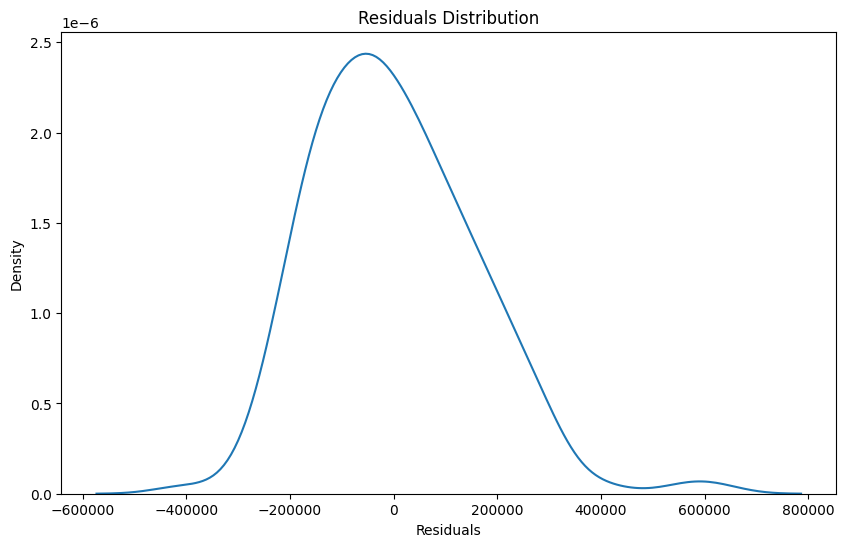

In [71]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))

# Residuals KDE plot
sns.kdeplot(residuals)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

In [49]:
#the bell curve is slightly on the negative side, but close to being around zero, not very symmertical either

In [50]:
#due to the negative skewness on the curve, the model is over prediciting the values
#the random peak near 600,000 suggests the model struggles to predict those values 
#the strong bell shape suggests the model is making a close as it can to unbaised predictions
#wide peak, not good 

In [51]:
#7 trees

In [52]:
#seems wrong?

In [53]:
#numeric decison tree

Accuracy:  0.0 

0.2627882075098059 this is the R^2 value
219434.33369822876 this is the RMSE value


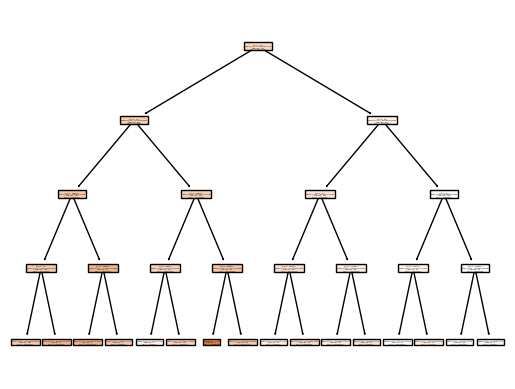

In [78]:
y = gdf['Price']
X = gdf[['Mileage_Run','No_of_Owners','age']]


## Test-train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor


model = tree.DecisionTreeRegressor(max_depth=4)
cart = model.fit(X_train, y_train) # Fit the classifier

# Visualize results:
tree.plot_tree(cart,filled=True) 

## Make Predictions on the Test Set
y_hat = cart.predict(X_test)

## Confusion Matrix
tab = pd.crosstab(y_test,y_hat) # Compute confusion matrix
acc = (tab.iloc[0,0]+tab.iloc[1,1])/(tab.iloc[0,0]+tab.iloc[1,1]+tab.iloc[0,1]+tab.iloc[1,0]) # Compute Accuracy
print('Accuracy: ', acc, '\n')
pd.crosstab(y_test,y_hat)

r2 = r2_score(y_test, y_hat)
print(r2, "this is the R^2 value")

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_hat))
print(rmse, "this is the RMSE value")

In [55]:
#the best max depth was 4, as gave highest r^2 value

In [56]:
#cat df

Accuracy:  1.0 

0.5068117377788844 this is the R^2 value
179479.4828178389 this is the RMSE value


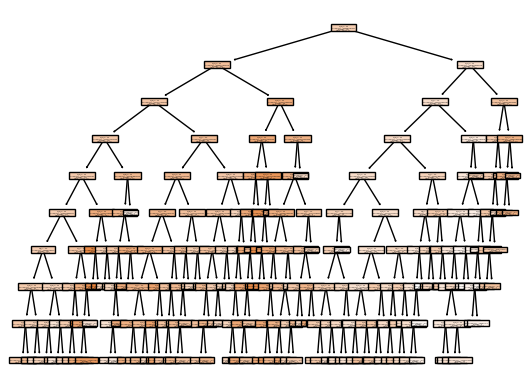

In [93]:
y = gdf['Price']
X = ddf #cat df


## Test-train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

from sklearn.tree import DecisionTreeRegressor

model = tree.DecisionTreeRegressor(max_depth=9)
cart = model.fit(X_train, y_train) # Fit the classifier

# Visualize results:
tree.plot_tree(cart,filled=True) 

## Make Predictions on the Test Set
y_hat = cart.predict(X_test)

## Confusion Matrix
tab = pd.crosstab(y_test,y_hat) # Compute confusion matrix
acc = (tab.iloc[0,0]+tab.iloc[1,1])/(tab.iloc[0,0]+tab.iloc[1,1]+tab.iloc[0,1]+tab.iloc[1,0]) # Compute Accuracy
print('Accuracy: ', acc, '\n')
pd.crosstab(y_test,y_hat)

r2 = r2_score(y_test, y_hat)
print(r2, "this is the R^2 value")

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_hat))
print(rmse, "this is the RMSE value")

In [58]:
#the best max dept was 9 as it gave you the highest R^2 value

In [59]:
#joint DF tree

Accuracy:  0.5 

0.5207823605791506 this is the R^2 value
176919.14880253226 this is the RMSE value


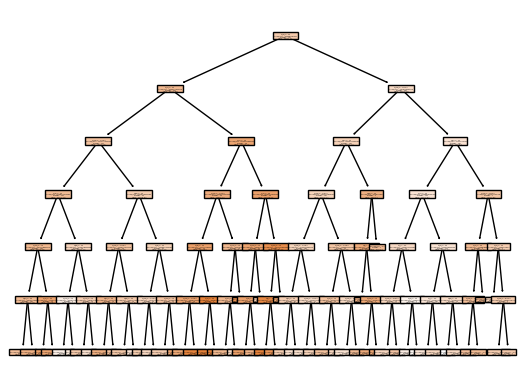

In [97]:
y = gdf['Price']
X = jointDF


## Test-train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=6)
cart = model.fit(X_train, y_train) # Fit the classifier

# Visualize results:
tree.plot_tree(cart,filled=True) 

## Make Predictions on the Test Set
y_hat = cart.predict(X_test)

## Confusion Matrix
tab = pd.crosstab(y_test,y_hat) # Compute confusion matrix
acc = (tab.iloc[0,0]+tab.iloc[1,1])/(tab.iloc[0,0]+tab.iloc[1,1]+tab.iloc[0,1]+tab.iloc[1,0]) # Compute Accuracy
print('Accuracy: ', acc, '\n')
pd.crosstab(y_test,y_hat)

r2 = r2_score(y_test, y_hat)
print(r2, "this is the R^2 value")

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_hat))
print(rmse, "this is the RMSE value")


In [61]:
#the best max depth was 6 as it gave you the highest R^2 value

In [62]:
# the joint tree gave you the best R^2 value of .52

In [63]:
#8

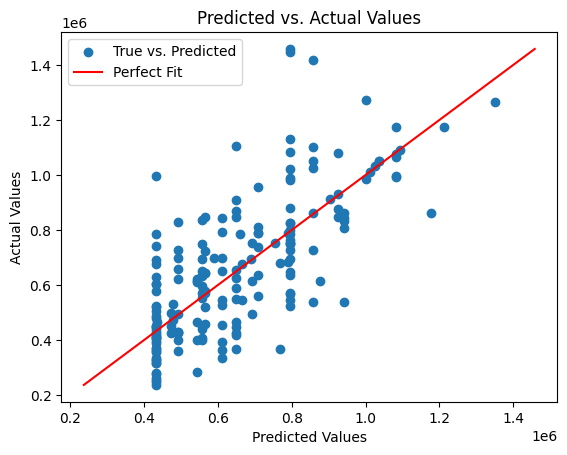

In [99]:
y = gdf['Price']
X = jointDF


## Test-train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

from sklearn.tree import DecisionTreeRegressor

model = tree.DecisionTreeRegressor(max_depth=6)
cart = model.fit(X_train, y_train) # Fit the classifier




reg = LinearRegression().fit(X_train, y_train) 
y_pred = cart.predict(X_test)

plt.scatter(x=y_pred, y=y_test, label='True vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='red', label='Perfect Fit')

plt.title('Predicted vs. Actual Values')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.legend()
plt.show()


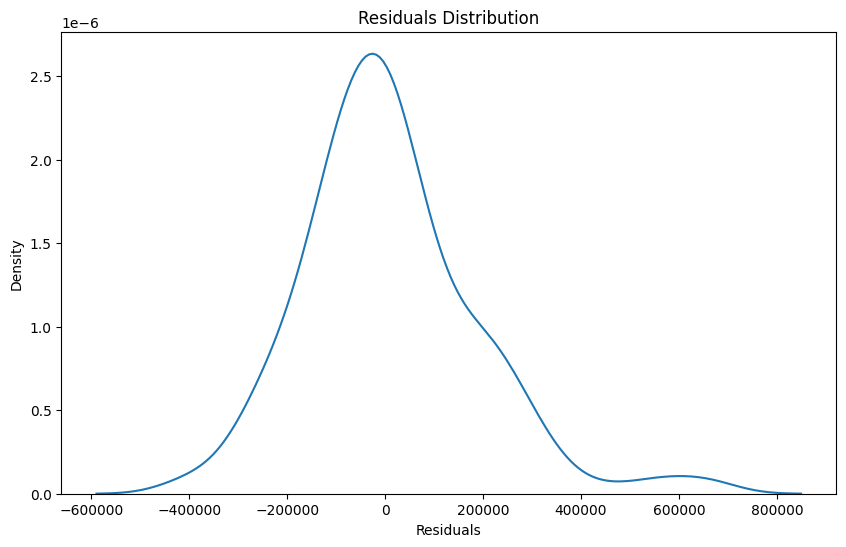

In [100]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))

# Residuals KDE plot
sns.kdeplot(residuals)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

In [66]:
#pretty code
#narrow point
#pretty symterical
#mostly around zero

In [67]:
#9
#the best is the linear model from the linear regression with the catergorical and numeric data

**Q2.** The is a question about regression using decision trees and linear models. The data include wages at data science-y jobs, including

  - `Rating`: Company worker happiness score
  - `Size`: Number of employees
  - `Sector`: Part of the economy
  - `avg_salary`: Average wage
  - `job_state`: Location of work

  1. Load the `wages_hw.csv` file. Split the sample into an ~80% training set and a ~20% test set. Do any necessary cleaning, including outliers and missings.
  2. Use a linear model to regress `avg_salary` on `Sector`. Which sectors have the highest predicted wages? What is the $R^2$ and `RMSE` on the test set? 
  3. Make a scatterplot of `avg_salary` and `Rating`. Is there an obvious visual relationship between the two variables? Regress `avg_salary` on `Rating` as a numeric variable: Do higher ratings predict higher or lower wages? Convert `Rating` to a one-hot encoded variable, with a category for each rating. Run a regression of `avg_salary` on the categorical version. How do your results change? Explain. Which version has a higher $R^2$ and lower `RMSE`?
  4. Now interact `Sector` with the categorical version of `Rating`, so your regressors are a (Sector, Rating) pair; this is a programming puzzle you'll have to think about, but using the `.PolynomialFeatures()` function on the one-hot encoded categorical variables is one option, and another is pre-processing a new variable that interacts `Sector` and `Rating` and then one-hot encoding the result. Regress `avg_salary` on the (Sector, Rating) pairs. How does the $R^2$ and `RMSE` on the test set compare to part 2? Interpret the coefficients; which sector-rating pairs have the highest wages?
  5. Run a linear regression of `avg_salary` on all the variables. What is the $R^2$ on the test set? How does it compare to your simpler models in 2--4? 
  6. Build a decision tree by regressing `avg_salary` on `Sector`, `Rating`, and the (Sector, Rating) pairs. What are the $R^2$ and `RMSE` of your models on the test set? How do your answers compare to parts 2, 3, and 4?
  7. Build a decision tree by regressing `avg_salary` on all the other variables. What is the $R^2$ and `RMSE` on the test set?
  8. Build a linear regression or decision tree using the available variables based on your own judgment. What degrees of freedom are you giving the model to predict variation in wages across company and location attributes? What is the $R^2$ and `RMSE` of your model? How does it compare to the previous ones in the question? Why does yours perform better or worse on the test set?

In [68]:
#1

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df1 = pd.read_csv('wages_hw.csv') 
# Import data into environment
df1.head()
gdf1 = df1.copy()


In [102]:
print(gdf1.head())
print(df1.shape, '\n')
print(df1.columns, '\n')
df1.describe()

   Unnamed: 0  Rating                    Size                        Sector  \
0           1     3.8   501 to 1000 employees           Aerospace & Defense   
1           2     3.4        10000+ employees                   Health Care   
2           3     4.8   501 to 1000 employees             Business Services   
3           4     3.8  1001 to 5000 employees  Oil, Gas, Energy & Utilities   
4           5     2.9     51 to 200 employees             Business Services   

   avg_salary job_state  
0        72.0        NM  
1        87.5        MD  
2        85.0        FL  
3        76.5        WA  
4       114.5        NY  
(731, 6) 

Index(['Unnamed: 0', 'Rating', 'Size', 'Sector', 'avg_salary', 'job_state'], dtype='object') 



,Unnamed: 0,Rating,avg_salary
count,731.000000,731.000000,731.000000
mean,370.120383,3.688372,100.090971
std,214.678534,0.570353,38.537585
min,1.000000,1.900000,13.500000
25%,184.500000,3.300000,73.000000
50%,369.000000,3.700000,96.500000
75%,555.500000,4.000000,122.500000
max,742.000000,5.000000,254.000000


count    731.000000
mean       3.688372
std        0.570353
min        1.900000
25%        3.300000
50%        3.700000
75%        4.000000
max        5.000000
Name: Rating, dtype: float64 

[3.8 3.4 4.8 2.9 4.1 3.3 4.6 3.5 3.2 3.7 3.6 3.9 4.3 4.2 4.  4.7 5.  3.1
 4.4 2.8 2.7 1.9 4.5 3.  2.3 2.6 2.4 2.5 2.2 2.1] 

3.9    63
3.8    61
3.7    61
3.5    49
4.0    47
3.6    46
3.4    44
3.3    39
3.2    35
4.4    33
4.3    32
4.7    31
4.2    26
3.1    25
4.1    19
2.9    18
3.0    17
2.7    14
2.6    12
4.6    10
4.8     9
2.4     7
2.8     7
4.5     7
2.1     5
5.0     5
1.9     3
2.3     2
2.5     2
2.2     2
Name: Rating, dtype: int64


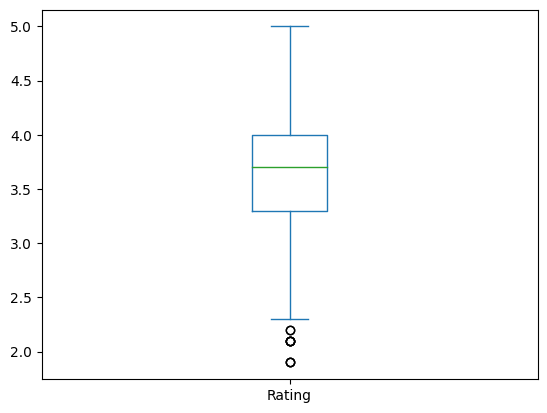

In [103]:
var = 'Rating'
print(df1[var].describe(),'\n') 
print(df1[var].unique(),'\n')
df1[var].plot.box()
gdf1 = df1.loc[df1[var]>=2.5,:] #remove outliers
print(df1[var].value_counts())

count                        731
unique                         8
top       1001 to 5000 employees
freq                         150
Name: Size, dtype: object 

['501 to 1000 employees' '10000+ employees' '1001 to 5000 employees'
 '51 to 200 employees' '201 to 500 employees' '5001 to 10000 employees'
 '1 to 50 employees' 'Unknown'] 

Total Missings: 
 2 

count      711.000000
mean      3265.049226
std       3755.742828
min         25.000000
25%        350.000000
50%        750.000000
75%       7500.000000
max      10000.000000
Name: Size, dtype: float64 

[  750 10000  2500   125   350  7500    25] 



/tmp/ipykernel_111390/4108284538.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf1[var] = gdf1[var].replace('Unknown', np.nan)
/tmp/ipykernel_111390/4108284538.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf1[var+'_NA'] = gdf1[var].isnull() # Create a bond missing dummy; long tail


<Axes: >

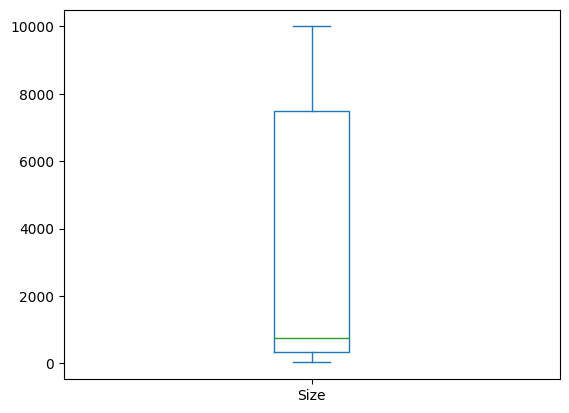

In [112]:
var = 'Size'
print(df1[var].describe(),'\n') 
print(df1[var].unique(),'\n') 
gdf1[var] = gdf1[var].replace('Unknown', np.nan)
gdf1[var+'_NA'] = gdf1[var].isnull() # Create a bond missing dummy; long tail
print('Total Missings: \n', sum(gdf1[var+'_NA']),'\n') 
gdf1=gdf1.loc[gdf1[var+'_NA']== 0,:] 
gdf1 = gdf1.replace(['501 to 1000 employees','10000+ employees','1001 to 5000 employees','51 to 200 employees','201 to 500 employees','5001 to 10000 employees','1 to 50 employees'], [750,10000,2500,125,350,7500,25])
gdf1[var] = gdf1[var].astype(int)

print(gdf1[var].describe(),'\n')
print(gdf1[var].unique(),'\n') 
gdf1[var].plot.box() #no outliers


count    731.000000
mean     100.090971
std       38.537585
min       13.500000
25%       73.000000
50%       96.500000
75%      122.500000
max      254.000000
Name: avg_salary, dtype: float64 

[ 72.   87.5  85.   76.5 114.5  95.   73.5 114.   61.  140.  163.5 139.
  65.5 113.5 146.  102.  153.5 142.5 105.5  96.  112.5  84.  143.   86.5
  99.5  47.5 121.  106.  107.  110.  147.5  88.   98.5  82.5 130.  155.
 184.5  29.5  81.   91.   68.  115.  109.5  75.5 154.5 143.5 139.5  67.
 118.   79.5  56.5 128.5  97.5  66.5 179.5  76.  112.   98.  128.  150.5
 124.   77.5  87.   53.5  85.5  48.  174.  106.5  72.5  99.  133.  237.5
  95.5 104.5  55.   61.5 157.   78.  132.5 108.   80.5 107.5 119.5 134.
 100.5 122.   92.5  62.   39.5  40.5  89.5 147.   81.5 168.   97.  100.
 105.  103.5 137.5  84.5 164.  169.  142.  171.5 145.   20.5 120.   71.5
  51.5 151.5  27.5 161.5 124.5 148.   59.  146.5  91.5 140.5  70.5  93.5
 134.5 181.  205.   48.5  21.5  52.5  64.   54.   89.   65.   20.   79.
  69.   

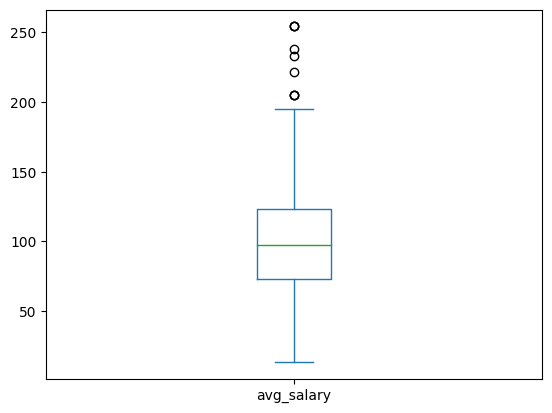

In [105]:
var = 'avg_salary'
print(df1[var].describe(),'\n') 
print(df1[var].unique(),'\n')  
print(gdf1[var].value_counts()) #looks good
gdf1[var].plot.box() 
gdf1 = df1.loc[df1[var]<=180,:] 

In [106]:
var = 'job_state'
print(df1[var].describe(),'\n') 
print(df1[var].unique(),'\n')  
print(gdf1[var].value_counts()) #Los Angeles
gdf1[var] = gdf1[var].replace(' Los Angeles', ' CA')
print(gdf1[var].value_counts())

count     731
unique     38
top        CA
freq      148
Name: job_state, dtype: object 

[' NM' ' MD' ' FL' ' WA' ' NY' ' TX' ' CA' ' VA' ' MA' ' NJ' ' CO' ' IL'
 ' KY' ' OR' ' CT' ' MI' ' DC' ' OH' ' AL' ' MO' ' PA' ' GA' ' IN' ' LA'
 ' WI' ' NC' ' AZ' ' NE' ' MN' ' Los Angeles' ' UT' ' TN' ' DE' ' ID'
 ' RI' ' IA' ' SC' ' KS'] 

 CA             138
 MA              96
 NY              71
 VA              41
 MD              35
 IL              35
 PA              33
 TX              28
 NC              21
 WA              19
 NJ              17
 FL              16
 OH              14
 TN              13
 CO              11
 WI              10
 DC              10
 IN              10
 UT              10
 AZ               9
 MO               9
 AL               8
 GA               6
 KY               6
 DE               6
 MI               6
 CT               5
 IA               5
 LA               4
 OR               4
 NE               4
 NM               3
 KS               3
 ID    

/tmp/ipykernel_111390/2247212198.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf1[var] = gdf1[var].replace(' Los Angeles', ' CA')


In [113]:
catDF1 = gdf1[["Sector", "job_state"]]

# Apply one-hot encoding to all categorical columns in catDF
ddf1 = pd.get_dummies(catDF1, dtype='int')


In [114]:
y = gdf1['avg_salary']
x = gdf1[['Rating','Size']]
X = pd.concat([x, ddf1], axis=1)


## Test-train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)


In [115]:
reg = LinearRegression().fit(X_train, y_train) # Fit the linear model
y_pred = reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

(reg.intercept_) # Intercept value
(reg.coef_) # Regression coefficients
print(reg.score(X_test, y_test),"is the R^2 value") # R squared measure 
print(rmse, "is the RMSE value")

0.16232140569258902 is the R^2 value
33.3746885759636 is the RMSE value


In [116]:
#2 
y = gdf1['avg_salary']

sector = gdf1["Sector"]

# Apply one-hot encoding to all categorical columns in catDF
X = pd.get_dummies(sector, dtype='int')


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

reg = LinearRegression().fit(X_train, y_train) # Fit the linear model
y_pred = reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

(reg.intercept_) # Intercept value
(reg.coef_) # Regression coefficients
print(reg.score(X_test, y_test),"is the R^2 value") # R squared measure 
print(rmse, "is the RMSE value")

predictions_df = pd.DataFrame({'Predicted Wages': y_pred})
predictions_df = pd.concat([X_test, predictions_df], axis=1)

print(predictions_df)


-9.882177915558662e+24 is the R^2 value
114631730142707.34 is the RMSE value
      -1  Accounting & Legal  Aerospace & Defense  Agriculture & Forestry  \
287  0.0                 0.0                  0.0                     0.0   
378  0.0                 0.0                  0.0                     0.0   
160  0.0                 0.0                  0.0                     0.0   
683  0.0                 0.0                  0.0                     0.0   
400  0.0                 0.0                  0.0                     0.0   
..   ...                 ...                  ...                     ...   
138  NaN                 NaN                  NaN                     NaN   
139  NaN                 NaN                  NaN                     NaN   
140  NaN                 NaN                  NaN                     NaN   
141  NaN                 NaN                  NaN                     NaN   
142  NaN                 NaN                  NaN                     NaN   

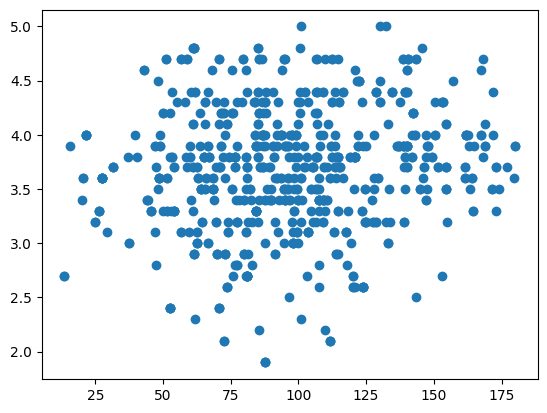

In [101]:
#3
plt.scatter(gdf1['avg_salary'],gdf1['Rating'])
#no, not an obvious relationship




In [106]:
y = gdf1['avg_salary']

X = gdf1['Rating'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

reg = LinearRegression().fit(X_train, y_train) # Fit the linear model
y_pred = reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

(reg.intercept_) # Intercept value
(reg.coef_) # Regression coefficients
print(reg.score(X_test, y_test),"is the R^2 value") # R squared measure 
print(rmse, "is the RMSE value")

-0.013953638706847737 is the R^2 value
36.71872241857596 is the RMSE value


In [117]:
predictions_df = pd.DataFrame({'Avg Salary': y_pred})
predictions_df = pd.concat([X_test, predictions_df], axis=1)

print(predictions_df)

      -1  Accounting & Legal  Aerospace & Defense  Agriculture & Forestry  \
287  0.0                 0.0                  0.0                     0.0   
378  0.0                 0.0                  0.0                     0.0   
160  0.0                 0.0                  0.0                     0.0   
683  0.0                 0.0                  0.0                     0.0   
400  0.0                 0.0                  0.0                     0.0   
..   ...                 ...                  ...                     ...   
138  NaN                 NaN                  NaN                     NaN   
139  NaN                 NaN                  NaN                     NaN   
140  NaN                 NaN                  NaN                     NaN   
141  NaN                 NaN                  NaN                     NaN   
142  NaN                 NaN                  NaN                     NaN   

     Arts, Entertainment & Recreation  Biotech & Pharmaceuticals  \
287    

In [ ]:
#higher ratings predict 

In [118]:

rating = gdf1["Rating"]

# Apply one-hot encoding to all categorical columns in catDF
X = pd.get_dummies(rating, dtype='int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

reg = LinearRegression().fit(X_train, y_train) # Fit the linear model
y_pred = reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

(reg.intercept_) # Intercept value
(reg.coef_) # Regression coefficients
print(reg.score(X_test, y_test),"is the R^2 value") # R squared measure 
print(rmse, "is the RMSE value")


-0.045166863195913454 is the R^2 value
37.2796073142341 is the RMSE value


In [119]:
predictions_df = pd.DataFrame({'Avg Salary': y_pred})
predictions_df = pd.concat([X_test, predictions_df], axis=1)

print(predictions_df)

     1.9  2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9  ...  4.1  4.2  4.3  \
287  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
378  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
160  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
683  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
400  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
138  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
139  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
140  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
141  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
142  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   

     4.4  4.5  4.6  4.7  4.8  5.0  Avg Salary  
287  0.0  0.0  0.0  0.0  0.

In [ ]:
#the model without transforming it through one-hot encoding has the lowest R^2 value (as in closess to zero) and has the lowest RMSE value 

In [136]:
#4
catDF11 = gdf1[["Sector",'Rating']]

# Apply one-hot encoding to all categorical columns in catDF
X = pd.get_dummies(catDF11, dtype='int')
               
y = gdf1['avg_salary']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

reg = LinearRegression().fit(X_train, y_train) # Fit the linear model
y_pred = reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

(reg.intercept_) # Intercept value
(reg.coef_) # Regression coefficients
print(reg.score(X_test, y_test),"is the R^2 value") # R squared measure 
print(rmse, "is the RMSE value")

0.12336054926164475 is the R^2 value
34.142004756991575 is the RMSE value


In [126]:
predictions_df = pd.DataFrame({'Avg Salary': y_pred})
predictions_df = pd.concat([X_test, predictions_df], axis=1)

print(predictions_df)

      -1  Accounting & Legal  Aerospace & Defense  Agriculture & Forestry  \
287  0.0                 0.0                  0.0                     0.0   
378  0.0                 0.0                  0.0                     0.0   
160  0.0                 0.0                  0.0                     0.0   
683  0.0                 0.0                  0.0                     0.0   
400  0.0                 0.0                  0.0                     0.0   
..   ...                 ...                  ...                     ...   
138  NaN                 NaN                  NaN                     NaN   
139  NaN                 NaN                  NaN                     NaN   
140  NaN                 NaN                  NaN                     NaN   
141  NaN                 NaN                  NaN                     NaN   
142  NaN                 NaN                  NaN                     NaN   

     Arts, Entertainment & Recreation  Biotech & Pharmaceuticals  \
287    

In [ ]:
#this is the best R^2 value we have gotten as its the highest especially compared to the negative R^2 value in 2

In [ ]:
#5 linear regression on all vars

In [134]:
y = gdf1['avg_salary']
num = gdf1['Size']
cat = gdf1[['Sector','job_state','Rating']]
x = pd.get_dummies(cat, dtype='int')

X = pd.concat([x, num], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

reg = LinearRegression().fit(X_train, y_train) # Fit the linear model
y_pred = reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

(reg.intercept_) # Intercept value
(reg.coef_) # Regression coefficients
print(reg.score(X_test, y_test),"is the R^2 value") # R squared measure 
print(rmse, "is the RMSE value")

-4095729271536061.0 is the R^2 value
2333695205.743427 is the RMSE value


In [ ]:
#low wrong R^2 value

Accuracy:  1.0 

-0.00014815370012444262 this is the R^2 value
36.46789383456659 this is the RMSE value


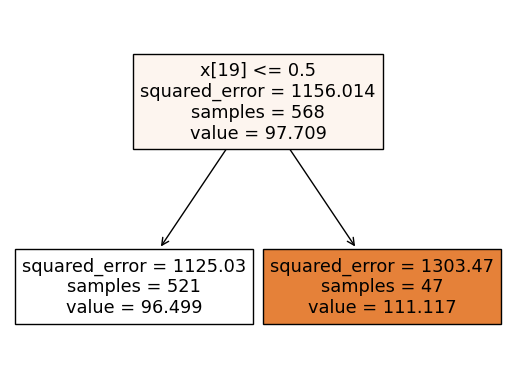

In [155]:
#6
#regress on rating
y = gdf1['avg_salary']

rating = gdf1["Rating"]

# Apply one-hot encoding to all categorical columns in catDF
X = pd.get_dummies(rating, dtype='int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)


## Test-train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor


model = tree.DecisionTreeRegressor(max_depth=1)
cart = model.fit(X_train, y_train) # Fit the classifier

# Visualize results:
tree.plot_tree(cart,filled=True) 

## Make Predictions on the Test Set
y_hat = cart.predict(X_test)

## Confusion Matrix
tab = pd.crosstab(y_test,y_hat) # Compute confusion matrix
acc = (tab.iloc[0,0]+tab.iloc[1,1])/(tab.iloc[0,0]+tab.iloc[1,1]+tab.iloc[0,1]+tab.iloc[1,0]) # Compute Accuracy
print('Accuracy: ', acc, '\n')
pd.crosstab(y_test,y_hat)

r2 = r2_score(y_test, y_hat)
print(r2, "this is the R^2 value")

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_hat))
print(rmse, "this is the RMSE value")

/tmp/ipykernel_111390/3007779260.py:29: RuntimeWarning: invalid value encountered in long_scalars
  acc = (tab.iloc[0,0]+tab.iloc[1,1])/(tab.iloc[0,0]+tab.iloc[1,1]+tab.iloc[0,1]+tab.iloc[1,0]) # Compute Accuracy


Accuracy:  nan 

0.12016028323333561 this is the R^2 value
34.20426750363984 this is the RMSE value


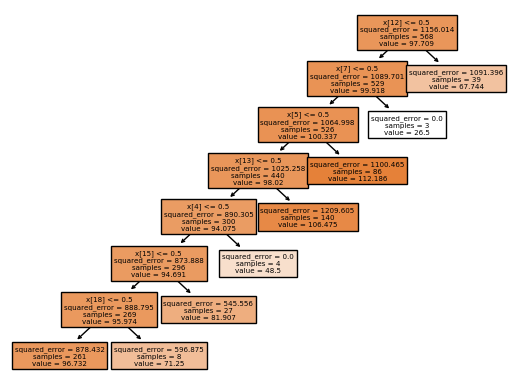

In [152]:

y = gdf1['avg_salary']

sector = gdf1["Sector"]

# Apply one-hot encoding to all categorical columns in catDF
X = pd.get_dummies(sector, dtype='int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)


## Test-train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor


model = tree.DecisionTreeRegressor(max_depth=7)
cart = model.fit(X_train, y_train) # Fit the classifier

# Visualize results:
tree.plot_tree(cart,filled=True) 

## Make Predictions on the Test Set
y_hat = cart.predict(X_test)

## Confusion Matrix
tab = pd.crosstab(y_test,y_hat) # Compute confusion matrix
acc = (tab.iloc[0,0]+tab.iloc[1,1])/(tab.iloc[0,0]+tab.iloc[1,1]+tab.iloc[0,1]+tab.iloc[1,0]) # Compute Accuracy
print('Accuracy: ', acc, '\n')
pd.crosstab(y_test,y_hat)

r2 = r2_score(y_test, y_hat)
print(r2, "this is the R^2 value")

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_hat))
print(rmse, "this is the RMSE value")

/tmp/ipykernel_111390/2686874949.py:30: RuntimeWarning: invalid value encountered in long_scalars
  acc = (tab.iloc[0,0]+tab.iloc[1,1])/(tab.iloc[0,0]+tab.iloc[1,1]+tab.iloc[0,1]+tab.iloc[1,0]) # Compute Accuracy


Accuracy:  nan 

0.2108220699455986 this is the R^2 value
32.39410449041283 this is the RMSE value


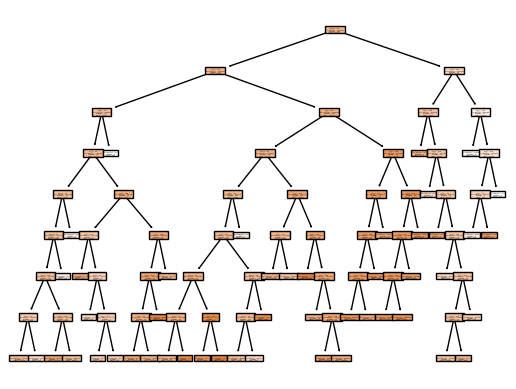

In [162]:
y = gdf1['avg_salary']

catDF11 = gdf1[["Sector",'Rating']]

# Apply one-hot encoding to all categorical columns in catDF
X = pd.get_dummies(catDF11, dtype='int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)


## Test-train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

model = tree.DecisionTreeRegressor(max_depth=8)
cart = model.fit(X_train, y_train) # Fit the classifier

# Visualize results:
tree.plot_tree(cart,filled=True) 

## Make Predictions on the Test Set
y_hat = cart.predict(X_test)

## Confusion Matrix
tab = pd.crosstab(y_test,y_hat) # Compute confusion matrix
acc = (tab.iloc[0,0]+tab.iloc[1,1])/(tab.iloc[0,0]+tab.iloc[1,1]+tab.iloc[0,1]+tab.iloc[1,0]) # Compute Accuracy
print('Accuracy: ', acc, '\n')
pd.crosstab(y_test,y_hat)

r2 = r2_score(y_test, y_hat)
print(r2, "this is the R^2 value")

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_hat))
print(rmse, "this is the RMSE value")

In [ ]:
#this is the best R^2 value that you got from all the dif problems in 2,3,4,5

/tmp/ipykernel_111390/614162303.py:26: RuntimeWarning: invalid value encountered in long_scalars
  acc = (tab.iloc[0,0]+tab.iloc[1,1])/(tab.iloc[0,0]+tab.iloc[1,1]+tab.iloc[0,1]+tab.iloc[1,0]) # Compute Accuracy


Accuracy:  nan 

0.330336858433219 this is the R^2 value
29.840542269932797 this is the RMSE value


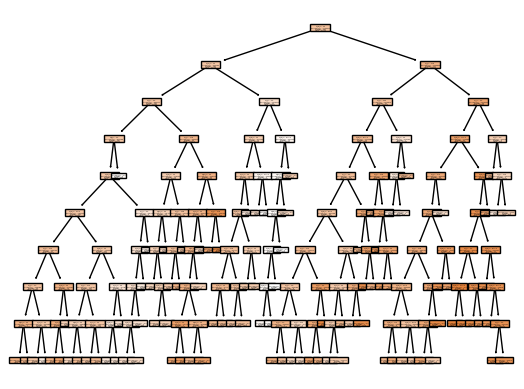

In [167]:
#7
y = gdf1['avg_salary']
num = gdf1['Size']
cat = gdf1[['Sector','job_state','Rating']]
x = pd.get_dummies(cat, dtype='int')

X = pd.concat([x, num], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)


## Test-train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

model = tree.DecisionTreeRegressor(max_depth=9)
cart = model.fit(X_train, y_train) # Fit the classifier

# Visualize results:
tree.plot_tree(cart,filled=True) 

## Make Predictions on the Test Set
y_hat = cart.predict(X_test)

## Confusion Matrix
tab = pd.crosstab(y_test,y_hat) # Compute confusion matrix
acc = (tab.iloc[0,0]+tab.iloc[1,1])/(tab.iloc[0,0]+tab.iloc[1,1]+tab.iloc[0,1]+tab.iloc[1,0]) # Compute Accuracy
print('Accuracy: ', acc, '\n')
pd.crosstab(y_test,y_hat)

r2 = r2_score(y_test, y_hat)
print(r2, "this is the R^2 value")

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_hat))
print(rmse, "this is the RMSE value")

/tmp/ipykernel_111390/3910621627.py:26: RuntimeWarning: invalid value encountered in long_scalars
  acc = (tab.iloc[0,0]+tab.iloc[1,1])/(tab.iloc[0,0]+tab.iloc[1,1]+tab.iloc[0,1]+tab.iloc[1,0]) # Compute Accuracy


Accuracy:  nan 

0.3476856430243097 this is the R^2 value
29.45147034972454 this is the RMSE value


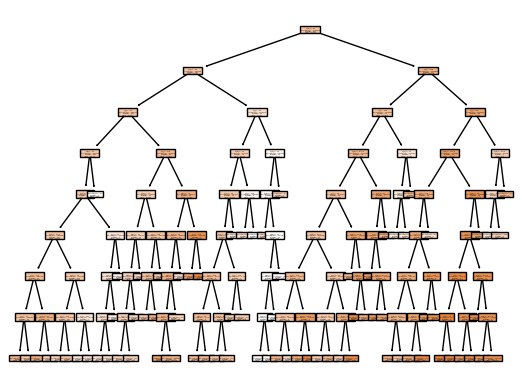

In [197]:
#8
y = gdf1['avg_salary']
num = gdf1['Size']
cat = gdf1[['Sector']]
x = pd.get_dummies(cat, dtype='int')

#X = pd.concat([x, num], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)


## Test-train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

model = tree.DecisionTreeRegressor(max_depth=8)
cart = model.fit(X_train, y_train) # Fit the classifier

# Visualize results:
tree.plot_tree(cart,filled=True) 

## Make Predictions on the Test Set
y_hat = cart.predict(X_test)

## Confusion Matrix
tab = pd.crosstab(y_test,y_hat) # Compute confusion matrix
acc = (tab.iloc[0,0]+tab.iloc[1,1])/(tab.iloc[0,0]+tab.iloc[1,1]+tab.iloc[0,1]+tab.iloc[1,0]) # Compute Accuracy
print('Accuracy: ', acc, '\n')
pd.crosstab(y_test,y_hat)

r2 = r2_score(y_test, y_hat)
print(r2, "this is the R^2 value")

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_hat))
print(rmse, "this is the RMSE value")

In [191]:
#chose these at i thought they would make the most sense for affecting salary 
#i dont use degree of freedom but i do use max dept of 8
#my R^2 and RMSE is slighlty better than 


**Q3.** This a question purely on categorical prediction. The data for this happen to be gathered in 1987 in Indonesia, and concern contraceptive method choice. The questions and data-gathering assumptions reflect the culture and attitudes of that time and place, but provide a good example of a categorical prediction problem on an important topic (family planning and maternal health The variables in the data are:

    - Wife's age (numerical)
    - Wife's education (categorical) 1=low, 2, 3, 4=high 
    - Husband's education (categorical) 1=low, 2, 3, 4=high 
    - Number of children ever born (numerical) 
    - Wife's religion (binary) 0=Non-Islam, 1=Islam
    - Wife's now working? (binary) 0=Yes, 1=No
    - Husband's occupation (categorical) 1, 2, 3, 4
    - Standard-of-living index (categorical) 1=low, 2, 3, 4=high
    - Media exposure (binary) 0=Good, 1=Not good
    - Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-termhort-term

  1. Load the `contraceptiveMethodChoice.csv` data. Tabulate the `method` variable (i.e. `.value_counts()`). 1 corresponds to `No Contraception`, 3 corresponds to `Short Term` (e.g. condoms, birth control pills), and 2 corresponds to `Long Term` (e.g. IUD, sterilization). Cross tabulate `method` and `numberChildren`. Do couples that use birth control tend to have more children than those who don't?
  2. Split the sample into ~80% training data and ~20% testing data.
  3. We are now going to make a mistake. Train a regression tree to predict the contraceptive method using the other variables in the data, not a classification tree. Look at the terminal nodes in the tree: What values do they take? Does that make sense? Explain clearly what has gone wrong here.
  4. Instead of regression, use a classification tree to predict contraceptive method using the other variables in the data. How does it look different from the previous tree? What variables does the algorithm use? In broad terms, which groups of people are most likely to use each method of contraception?
  5. Compute a confusion matrix for your classification tree on the test set (Hint: There are now three categories instead of two, so the cross tabulation will be a $3 \times 3$ matrix instead of $2 \times 2$.). Compute the Accuracy of your model overall, and the Accuracy for predicting each contraceptive method.
  7. Why can't you use a linear probability model to do this exercise? Explain clearly in words.

**Q4.** This is a question where we use regression and regression trees. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent 
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running these regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q5.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where 
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{eqnarray*}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{eqnarray*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{eqnarray*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{eqnarray*}

which can be written in terms of sample covariance and sample variance as:

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{eqnarray*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)
6. Let's return to the question of *outliers*. With your formula for the OLS coefficients $(a^*,b^*)$, explain what happens if you significantly increase a single value of the outcome/target/response variable $y_i$ or one of the predictor/explanatory/covariate variables $x_i$. If values for some extreme observations are exerting significant influence over the regression coefficients, will the model perform well on for more average observations?